<a href="https://colab.research.google.com/github/vicentemf/Mercado-Financeiro/blob/main/compara%C3%A7%C3%A3o_carteira_ibov_cdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #Este artigo tem como objetivo criar uma rotina onde o investidor consiga checar de forma rápida e simples o desenvolvimento no tempo de uma carteira de ações a sua escolha .
 #Ao final é possível também compararar com o ETF BOVA11 e o CDI, assim, o investidor saberá o quanto sua carteira performou em relação ao mercado em geral .
 

In [45]:
!pip install yfinance #instalado a base de dados do Yahoo Finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
#bibliotecas que serão utizadas para extração e manipulação dos dados
import yfinance as yf
import numpy as np
import pandas as pd

#O espaço abaixo é destinada para a seleção de ativos e a série histórica que será pesquisada. Não existe um limite de ativos porém é importante ressaltar que uma boa carteira leva em conta a diversificação de seus papéis.
#Escolhi uma série histórica de inicio aleatório e o final foi escolhido a partir do primeiro dia do mês que escrevi esta rotina mas podemos alterar para datas mais interessantes como períodos de mercado de alta/baixa,ciclos econômicos,recuperações econômicas etc,análise de dias históricos etc etc..

In [47]:
ativos=["BBDC4.SA","WEGE3.SA","TRPL4.SA","ABEV3.SA"]
inicio="2014-01-01"
fim="2022-06-01"

In [48]:
#Aqui eu busco apenas deixar a coluna de fechamento ajustado pois será com ela que montarei meu gráfico .
cotacao_diaria=yf.download(ativos,inicio,fim)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [49]:
#cotação diária dos ativos
cotacao_diaria.head(5)

,ABEV3.SA,BBDC4.SA,TRPL4.SA,WEGE3.SA
Date,,,,
2014-01-02,12.606937,7.718975,3.420537,3.858670
2014-01-03,12.338703,7.689411,3.572064,3.823129
2014-01-06,12.179216,7.753921,3.557570,3.843438
2014-01-07,12.563438,7.584598,3.498277,3.840900
2014-01-08,12.686684,7.579219,3.544394,3.774895


In [50]:
#Este comando é útil para checar se existem dados nulos/faltantes na nossa pesquisa .
cotacao_diaria.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2090 entries, 2014-01-02 to 2022-05-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  2089 non-null   float64
 1   BBDC4.SA  2089 non-null   float64
 2   TRPL4.SA  2089 non-null   float64
 3   WEGE3.SA  2089 non-null   float64
dtypes: float64(4)
memory usage: 81.6 KB


In [51]:
#Como existe um dado nulo utilizarei um comando para excluí-lo dos dados .
cotacao_diaria.dropna(inplace=True)

In [52]:
#checando dados nulos após exclusão 
cotacao_diaria.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2089 entries, 2014-01-02 to 2022-05-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  2089 non-null   float64
 1   BBDC4.SA  2089 non-null   float64
 2   TRPL4.SA  2089 non-null   float64
 3   WEGE3.SA  2089 non-null   float64
dtypes: float64(4)
memory usage: 81.6 KB


#Aqui utilizarei um dicionário que conectará cada papel a um valor de aporte. 

#Simulei uma situação onde foi feito um único aporte no valor de 100.000 reais onde 40% será destinado a BBDC4, 25% a TRPL4,25% a WEGE3 e 10% a ABEV3 .Nesta rotina não foram incluídos novos aportes e nem reinvestimentos de dividendos ou juros sobre capital próprio.

In [53]:
aporte={"ABEV3.SA":10000,"BBDC4.SA":40000,"TRPL4.SA":25000,"WEGE3.SA":25000}
aporte_df=pd.Series(data=aporte,index=list(aporte.keys()))

In [54]:
aporte_df #quantidade financeira aportada

ABEV3.SA    10000
BBDC4.SA    40000
TRPL4.SA    25000
WEGE3.SA    25000
dtype: int64

In [55]:
cotacao_diaria.iloc[0] #cotação no dia do primeiro aporte

ABEV3.SA    12.606937
BBDC4.SA     7.718975
TRPL4.SA     3.420537
WEGE3.SA     3.858670
Name: 2014-01-02 00:00:00, dtype: float64

In [56]:
aporte_df/(cotacao_diaria.iloc[0]) #quantos papéis foram comprados

ABEV3.SA     793.214060
BBDC4.SA    5182.035455
TRPL4.SA    7308.793922
WEGE3.SA    6478.916717
dtype: float64

In [57]:
carteira=cotacao_diaria*aporte_df/(cotacao_diaria.iloc[0]) #posições diárias nos ativos


In [58]:
carteira.head() #visualização da carteira

,ABEV3.SA,BBDC4.SA,TRPL4.SA,WEGE3.SA
Date,,,,
2014-01-02,10000.000000,40000.000000,25000.000000,25000.000000
2014-01-03,9787.232819,39846.801273,26107.482575,24769.733993
2014-01-06,9660.725671,40181.093700,26001.545853,24901.312582
2014-01-07,9965.495987,39303.653608,25568.187046,24884.869313
2014-01-08,10063.255844,39275.783345,25905.243702,24457.228470


In [59]:
#Criação de nova coluna com a evolução do patrimônio no tempo
carteira["patrimonio"]=carteira["ABEV3.SA"]+carteira["BBDC4.SA"]+carteira["TRPL4.SA"]+carteira["WEGE3.SA"]



In [60]:
carteira #visuaização da nova coluna

,ABEV3.SA,BBDC4.SA,TRPL4.SA,WEGE3.SA,patrimonio
Date,,,,,
2014-01-02,10000.000000,40000.000000,25000.000000,25000.000000,100000.000000
2014-01-03,9787.232819,39846.801273,26107.482575,24769.733993,100511.250660
2014-01-06,9660.725671,40181.093700,26001.545853,24901.312582,100744.677805
2014-01-07,9965.495987,39303.653608,25568.187046,24884.869313,99722.205954
2014-01-08,10063.255844,39275.783345,25905.243702,24457.228470,99701.511361
...,...,...,...,...,...
2022-05-25,11136.725366,104474.904439,183669.985137,163981.378651,463262.993592
2022-05-26,11271.571816,105044.397769,178992.361487,166572.942866,461881.273938
2022-05-27,11271.571816,106545.769506,177530.611067,169877.191875,465225.144264


In [61]:
#biblioteca que gosto para moldar gráficos
import seaborn as sns

In [62]:
sns.set_style("darkgrid")

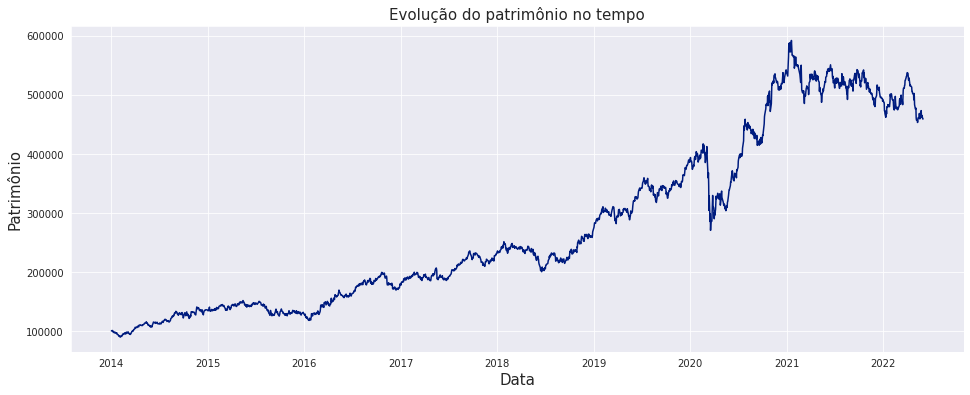

In [63]:
#Melhoria visual do gráfico
grafico=sns.lineplot(data=carteira["patrimonio"])
grafico.set_title("Evolução do patrimônio no tempo",fontsize=15)
grafico.set_ylabel("Patrimônio",fontsize=15)
grafico.set_xlabel("Data",fontsize=15)
grafico.figure.set_size_inches(16,6)

In [64]:
#download do fechamento ajustado do ETF BOVA11
bova11= yf.download('BOVA11.SA', inicio, fim)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [65]:
bova11=pd.DataFrame(bova11)

In [66]:
#comando para buscar possíveis dados nulos
bova11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2089 entries, 2014-01-02 to 2022-05-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2089 non-null   float64
dtypes: float64(1)
memory usage: 32.6 KB


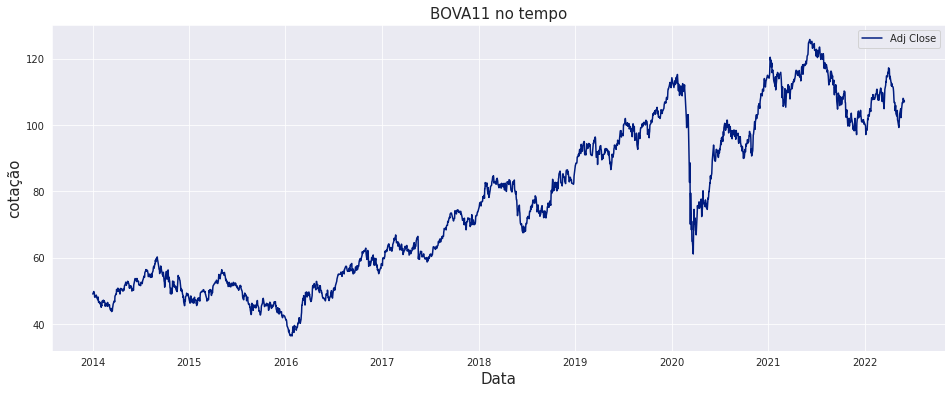

In [67]:
#Melhoria visual do gráfico
grafico2=sns.lineplot(data=bova11)
grafico2.set_title("BOVA11 no tempo",fontsize=15)
grafico2.set_ylabel("cotação",fontsize=15)
grafico2.set_xlabel("Data",fontsize=15)
grafico2.figure.set_size_inches(16,6)

#Aqui executarei comandos para unir os dataframes vistos anteriormente(a carteira,o patrimônio alocado e o fechamento do ETF BOVA11).

#Utilizarei a técnica de normalização dos ativos,que basicamente consiste em apresentar os dados em uma mesma escala para o leitor poder mensurar o possível ganho(ou perda) da carteira em relação ao benchmark. Sem a normalização teríamos uma falsa comparação pois os papéis apresentam valores nominais diferentes. 



In [68]:
from functools import reduce

In [69]:
#unindo os dataframes
dfs=[carteira,bova11]

In [70]:
#função para juntá-los pela data
comparacao=reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)

In [71]:
comparacao

,ABEV3.SA,BBDC4.SA,TRPL4.SA,WEGE3.SA,patrimonio,Adj Close
Date,,,,,,
2014-01-02,10000.000000,40000.000000,25000.000000,25000.000000,100000.000000,49.080002
2014-01-03,9787.232819,39846.801273,26107.482575,24769.733993,100511.250660,49.259998
2014-01-06,9660.725671,40181.093700,26001.545853,24901.312582,100744.677805,49.840000
2014-01-07,9965.495987,39303.653608,25568.187046,24884.869313,99722.205954,49.230000
2014-01-08,10063.255844,39275.783345,25905.243702,24457.228470,99701.511361,49.279999
...,...,...,...,...,...,...
2022-05-25,11136.725366,104474.904439,183669.985137,163981.378651,463262.993592,106.660004
2022-05-26,11271.571816,105044.397769,178992.361487,166572.942866,461881.273938,108.019997
2022-05-27,11271.571816,106545.769506,177530.611067,169877.191875,465225.144264,107.900002


In [72]:
#técnica de normalização
comparacao_normalizado = comparacao/comparacao.iloc[0]

In [73]:
comparacao_normalizado

,ABEV3.SA,BBDC4.SA,TRPL4.SA,WEGE3.SA,patrimonio,Adj Close
Date,,,,,,
2014-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-01-03,0.978723,0.996170,1.044299,0.990789,1.005113,1.003667
2014-01-06,0.966073,1.004527,1.040062,0.996053,1.007447,1.015485
2014-01-07,0.996550,0.982591,1.022727,0.995395,0.997222,1.003056
2014-01-08,1.006326,0.981895,1.036210,0.978289,0.997015,1.004075
...,...,...,...,...,...,...
2022-05-25,1.113673,2.611873,7.346799,6.559255,4.632630,2.173187
2022-05-26,1.127157,2.626110,7.159694,6.662918,4.618813,2.200896
2022-05-27,1.127157,2.663644,7.101224,6.795088,4.652251,2.198451


In [74]:
#colunas que me interessam para montar o gráfico
comparacao_normalizado[["patrimonio","Adj Close"]]

,patrimonio,Adj Close
Date,,
2014-01-02,1.000000,1.000000
2014-01-03,1.005113,1.003667
2014-01-06,1.007447,1.015485
2014-01-07,0.997222,1.003056
2014-01-08,0.997015,1.004075
...,...,...
2022-05-25,4.632630,2.173187
2022-05-26,4.618813,2.200896
2022-05-27,4.652251,2.198451


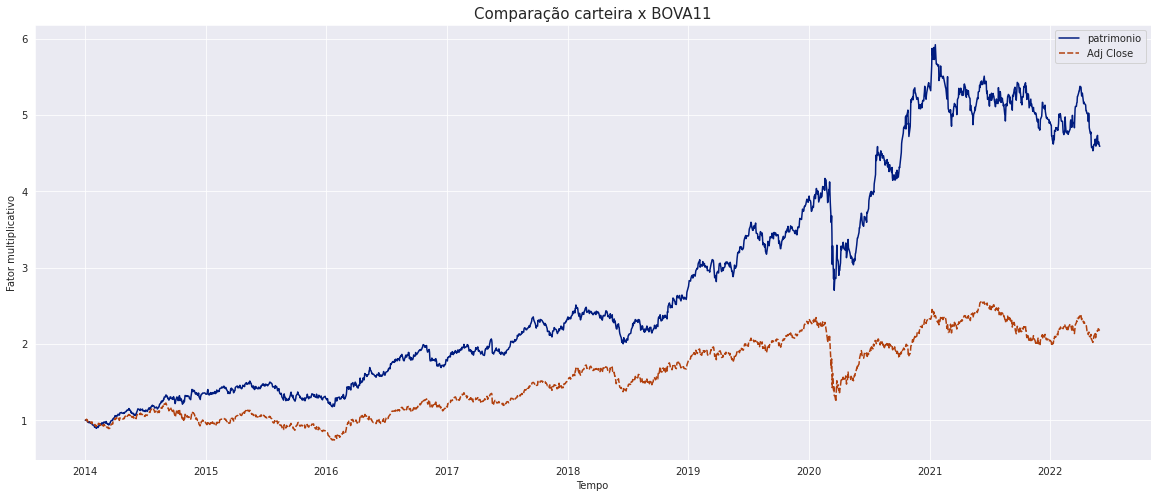

In [75]:
#Melhoria visual do gráfico
grafico3=sns.lineplot(data=comparacao_normalizado[["patrimonio","Adj Close"]])
grafico3.set_title("Comparação carteira x BOVA11",fontsize=15)
grafico3.set_xlabel("Tempo")
grafico3.set_ylabel("Fator multiplicativo")
grafico3.figure.set_size_inches(20,8)
sns.set_palette("dark")


#Pelo gráfico podemos perceber que a carteira escolhida disparou em relação ao ETF BOVA11( e por consequência em relação ao IBOVESPA também).

#Para fins de curiosidade vamos compará-la ao CDI

#O CDI(certificado de depósito interbancário) é um título com prazo de vencimento de 1(um) dia útil e serve para que um banco empreste dinheiro para outro banco . O Banco Central determina  que os bancos encerrem o dia com caixa positivo e o CDI funciona como um sistema de segurança,uma garantia de que isso seja possível .

#Neste tipo de empréstimo entre bancos, há cobrança de juros.A B3 calcula essa taxa e a divulga diariamente como "taxa DI".


#Por fim, esta taxa se torna referência da renda fixa para o mercado financeiro refletindo os juros médios das operações entre bancos.Existem diversas aplicações que são atreladas a este indicador .






#O Banco central do Brasil mantém o "SGS- Sistema Gerador de Séries Temporais"

#Lá é possível pesquisar séries históricas de todos os indicadores divulgados pelo Banco Central, o site se encontra abaixo.



https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [76]:
#dados aberto do Banco Central do Brasil
url= 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados?formato=json'

In [77]:
#leitura dos dados
df=pd.read_json(url)

In [78]:
#checando dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    9074 non-null   object 
 1   valor   9074 non-null   float64
dtypes: float64(1), object(1)
memory usage: 141.9+ KB


In [79]:
df.head()

,data,valor
0,06/03/1986,0.068111
1,10/03/1986,0.069028
2,12/03/1986,0.067417
3,14/03/1986,0.064584
4,17/03/1986,0.068222


#Transformarei este dataframe seguindo a métrica dos dataframes anteriores para evitar erros de indexação. 

#A coluna data será transformada em"date" e em seguida será escolhida como index .

#Os dados serão normalizados e unidos ao dataframe da carteira e patrimônio .

In [80]:
df["Date"] =pd.to_datetime(df["data"], dayfirst=True)
df.set_index("Date", inplace=True)

In [81]:
#Manterei apenas as datas que interessam 
cdi=pd.DataFrame(df["valor"])
cdi2=cdi[cdi.index >= inicio]

In [82]:
cdi2.head()

,valor
Date,
2014-01-02,0.036998
2014-01-03,0.036998
2014-01-06,0.036998
2014-01-07,0.036998
2014-01-08,0.036998


In [83]:
#técnica de normalização
cdi_normalizado=cdi2/cdi2.iloc[0]

In [89]:
cdi_normalizado.head()

,valor
Date,
2014-01-02,1.0
2014-01-03,1.0
2014-01-06,1.0
2014-01-07,1.0
2014-01-08,1.0


In [85]:
#unindo os dataframes
dfs2=[comparacao_normalizado,cdi_normalizado]

In [86]:
final=reduce(lambda left,right: pd.merge(left,right,on='Date'),dfs2 )

In [87]:
final

,ABEV3.SA,BBDC4.SA,TRPL4.SA,WEGE3.SA,patrimonio,Adj Close,valor
Date,,,,,,,
2014-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
2014-01-03,0.978723,0.996170,1.044299,0.990789,1.005113,1.003667,1.00000
2014-01-06,0.966073,1.004527,1.040062,0.996053,1.007447,1.015485,1.00000
2014-01-07,0.996550,0.982591,1.022727,0.995395,0.997222,1.003056,1.00000
2014-01-08,1.006326,0.981895,1.036210,0.978289,0.997015,1.004075,1.00000
...,...,...,...,...,...,...,...
2022-05-25,1.113673,2.611873,7.346799,6.559255,4.632630,2.173187,1.27788
2022-05-26,1.127157,2.626110,7.159694,6.662918,4.618813,2.200896,1.27788
2022-05-27,1.127157,2.663644,7.101224,6.795088,4.652251,2.198451,1.27788


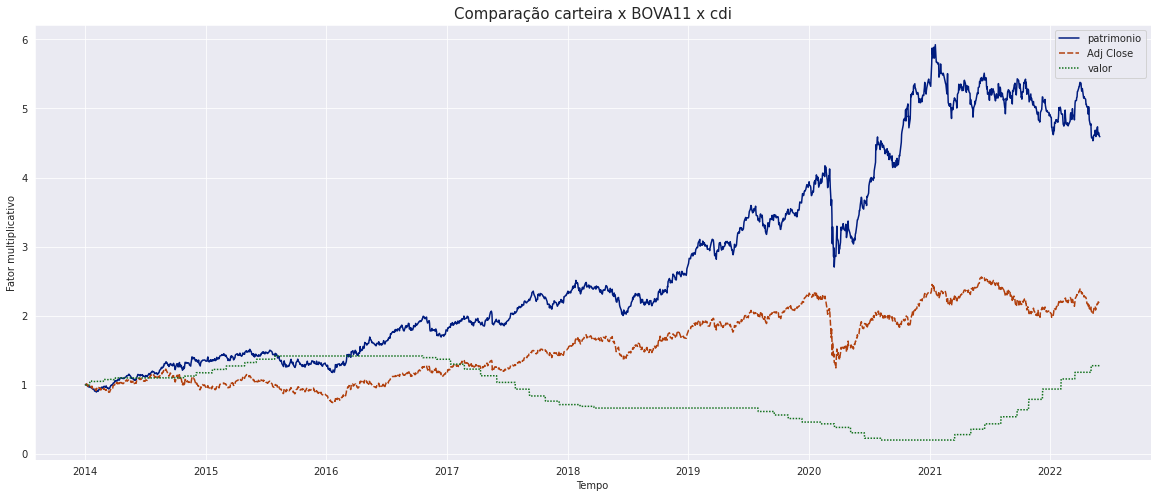

In [88]:
#melhorias gráficas
grafico3=sns.lineplot(data=final[["patrimonio","Adj Close","valor"]])
grafico3.set_title("Comparação carteira x BOVA11 x cdi",fontsize=15)
grafico3.set_xlabel("Tempo")
grafico3.set_ylabel("Fator multiplicativo")
grafico3.figure.set_size_inches(20,8)
sns.set_palette("dark")

#De longe podemos perceber que uma carteira com boas empresas bate de longe a renda fixa e o índice IBOVESPA.

#É importante ressaltar que não foram feitos novos aportes ou reinvestido dividendos/JCP,o que levaria o desempenho da carteira a resultados exponenciais.

#Com esta rotina considero fácil checar rapidamente o desempenho de uma carteira em relação a seus benchmarks .Com a Api do Banco Central podemos escolher outros indicadores e com a biblioteca Yahoo Finance testar outras carteiras/ETFS....

#Lembrando também que rendimento passado não é garantia de rendimento futuro e esta rotina tem apenas fins educacionais .